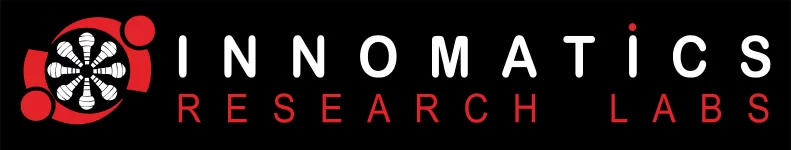

<h1 style="text-align: left; font-weight: bold; font-size: 36px; ">🍿Movie Recommendation System Using ML 🎥</h1>

#  Overview  

<p style="font-size: 16px;">This notebook focuses on building a content-based movie recommendation system using a dataset containing diverse movie features. By leveraging attributes such as genres, directors, cast, and plot descriptions, this analysis aims to provide personalized movie suggestions based on user preferences and similar content.</p>

# Table of Contents
- [Data Loading](#Data-Loading)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Data Cleaning & Preprocessing](#Data-Cleaning-&-Preprocessing)
- [Model Training](#Model-Training)
- [Recommendation System](#Recommendation-System)
- [Conclusion](#Conclusion)

## Objectives  
<p style="font-size: 16px;">- Explore the relationships between features such as genres, keywords, cast, and crew to enhance movie recommendations. <br>
- Perform exploratory data analysis (EDA) to understand the distribution and frequency of different features. <br>
- Build a content-based recommendation system that suggests movies based on user preferences and movie attributes. <br>
- Provide personalized movie recommendations to users by analyzing movie characteristics and aligning them with user interests.</p>


## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_credits = pd.read_csv(r"/content/tmdb_5000_credits.csv")
df_movies = pd.read_csv(r"/content/tmdb_5000_movies.csv")

## Exploratory Data Analysis

In [3]:
df_credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
print('Credit dataset shape', df_credits.shape)
print('Movie dataset shape', df_movies.shape)

Credit dataset shape (4803, 4)
Movie dataset shape (4803, 20)


In [6]:
print('Credit dataset size', df_credits.size)
print('Movie dataset size', df_movies.size)

Credit dataset size 19212
Movie dataset size 96060


In [7]:
 df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [8]:
 df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
# To Concatenate both the dataframe we can either use 'id' or 'title'

df = df_movies.merge(df_credits,on='title')

In [10]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [12]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [13]:
df.isnull().sum()

,0
budget,0
genres,0
homepage,3096
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [14]:
df.nunique()

,0
budget,436
genres,1175
homepage,1691
id,4803
keywords,4222
original_language,37
original_title,4801
overview,4800
popularity,4802
production_companies,3697


In [15]:
df.duplicated().sum()

0

## Data Visualization

In [16]:
# Function to split and count values in dictionary-like columns

def count_values(column):
    items = [item for sublist in df[column].dropna().apply(lambda x: x.split(',')) for item in sublist]
    return dict(Counter(items))

# Genres distribution
genres_count = count_values('genres')
genres_df = pd.DataFrame(genres_count.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Keywords distribution
keywords_count = count_values('keywords')
keywords_df = pd.DataFrame(keywords_count.items(), columns=['Keyword', 'Count']).sort_values(by='Count', ascending=False)

# Production companies distribution
prod_companies_count = count_values('production_companies')
prod_companies_df = pd.DataFrame(prod_companies_count.items(), columns=['Company', 'Count']).sort_values(by='Count', ascending=False)

# Spoken languages distribution
spoken_languages_count = count_values('spoken_languages')
spoken_languages_df = pd.DataFrame(spoken_languages_count.items(), columns=['Language', 'Count']).sort_values(by='Count', ascending=False)

# Cast distribution (Limit to top 10 for better visualization)
cast_count = count_values('cast')
cast_df = pd.DataFrame(cast_count.items(), columns=['Cast', 'Count']).sort_values(by='Count', ascending=False).head(10)

# Crew distribution (Limit to top 10 for better visualization)
crew_count = count_values('crew')
crew_df = pd.DataFrame(crew_count.items(), columns=['Crew', 'Count']).sort_values(by='Count', ascending=False).head(10)

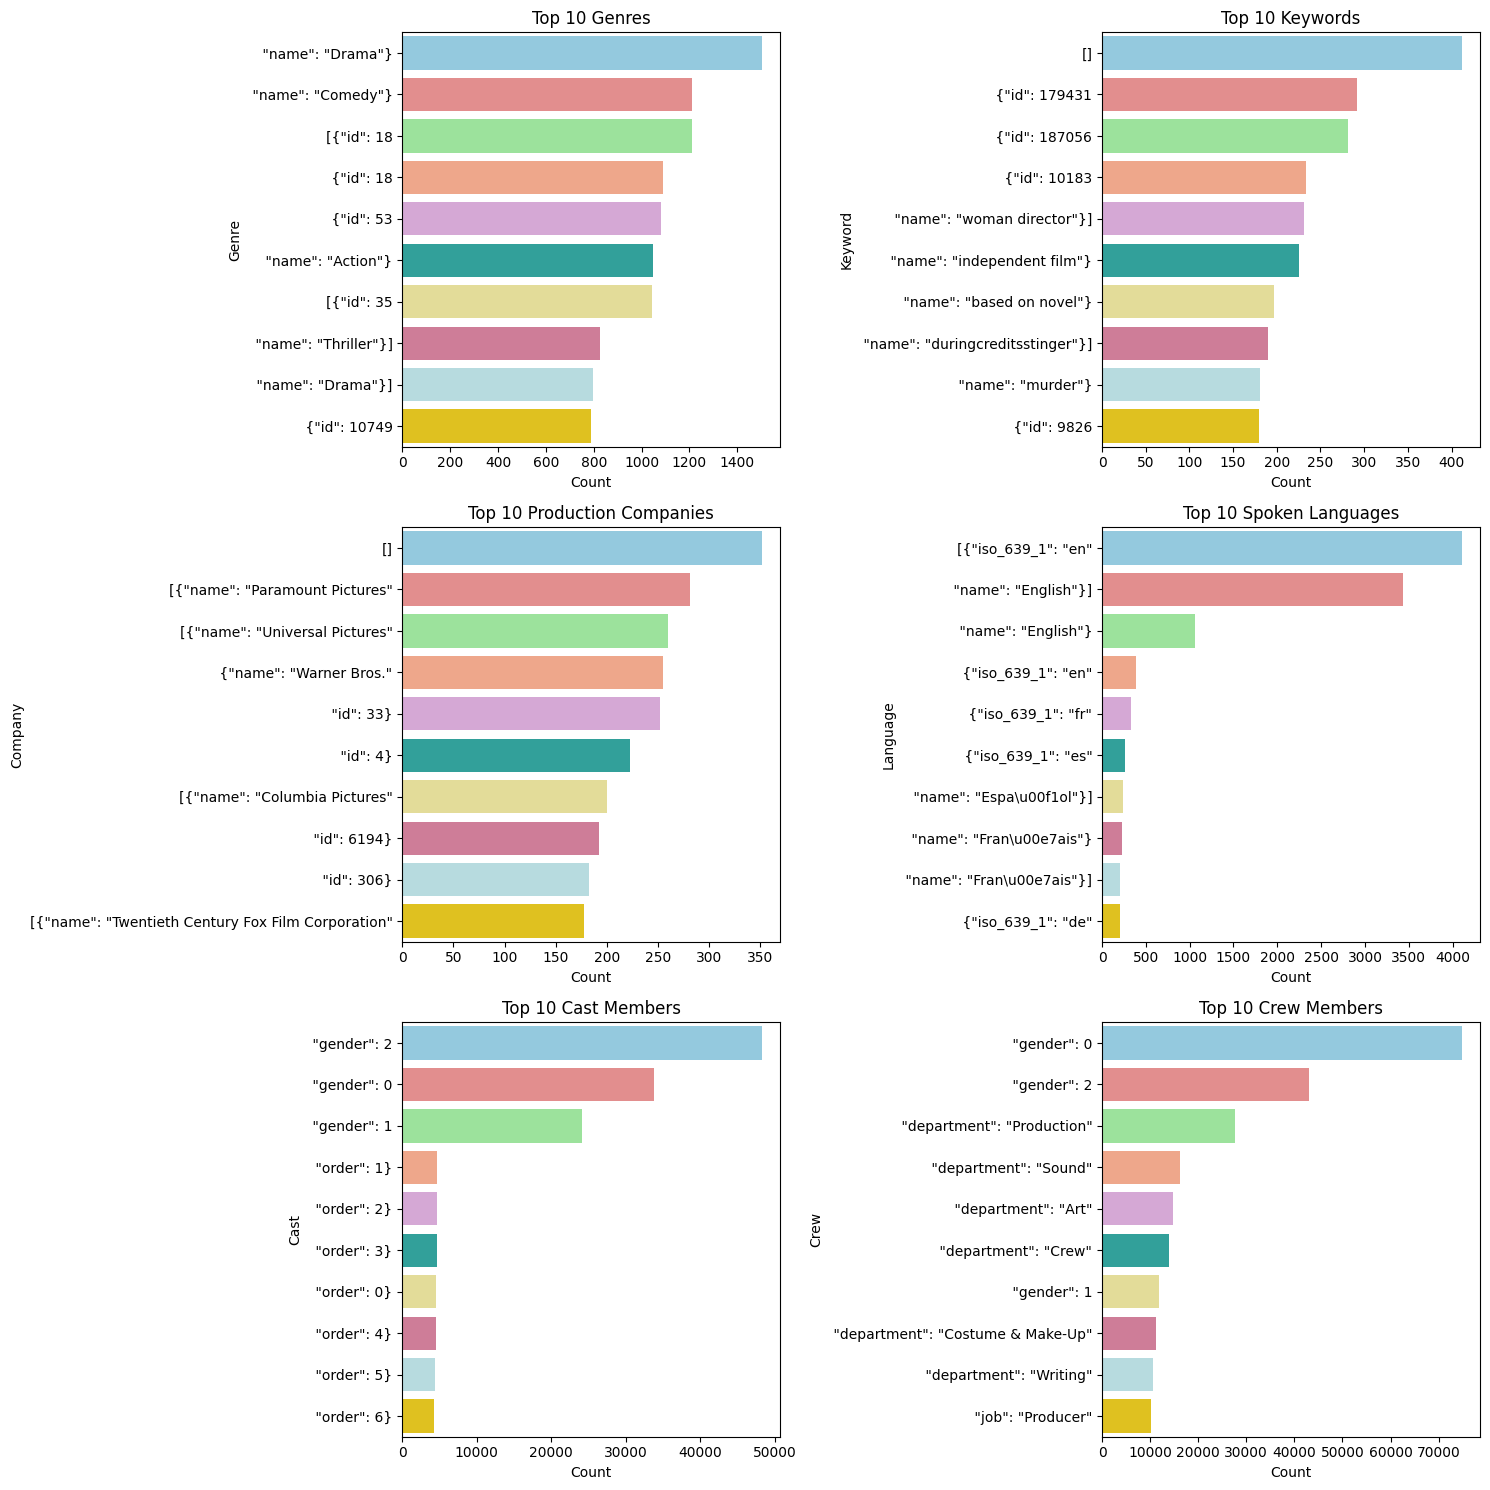

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'plum', 'lightseagreen', 'khaki', 'palevioletred', 'powderblue', 'gold']

# Genres bar plot
sns.barplot(x='Count', y='Genre', data=genres_df.head(10), palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Genres')

# Keywords bar plot
sns.barplot(x='Count', y='Keyword', data=keywords_df.head(10), palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Keywords')

# Production companies bar plot
sns.barplot(x='Count', y='Company', data=prod_companies_df.head(10), palette=colors, ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Production Companies')

# Spoken languages bar plot
sns.barplot(x='Count', y='Language', data=spoken_languages_df.head(10), palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Spoken Languages')

# Cast bar plot
sns.barplot(x='Count', y='Cast', data=cast_df, palette=colors, ax=axes[2, 0])
axes[2, 0].set_title('Top 10 Cast Members')

# Crew bar plot
sns.barplot(x='Count', y='Crew', data=crew_df, palette=colors, ax=axes[2, 1])
axes[2, 1].set_title('Top 10 Crew Members')

plt.tight_layout()
plt.show()


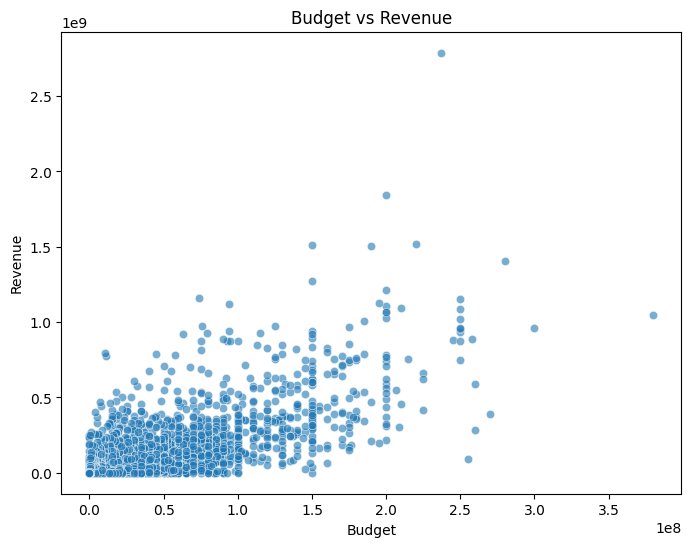

In [18]:
# Plot to compare Budget vs Revenue

plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.6)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

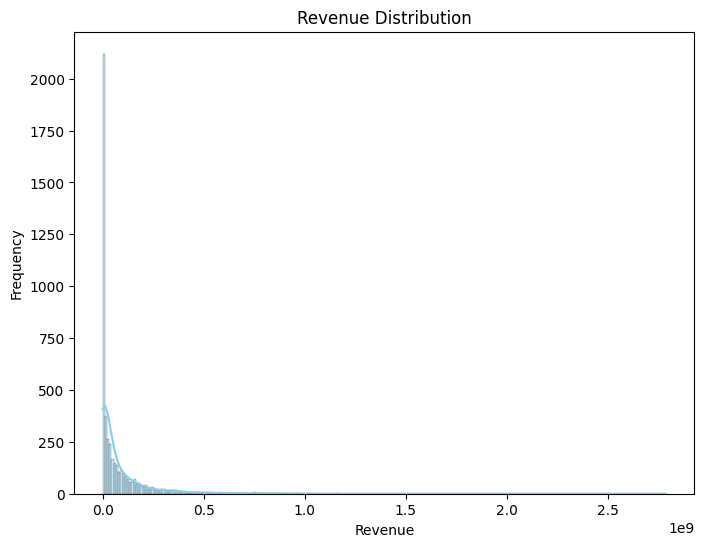

In [19]:
# Plot for Revenue Distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['revenue'], kde=True, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

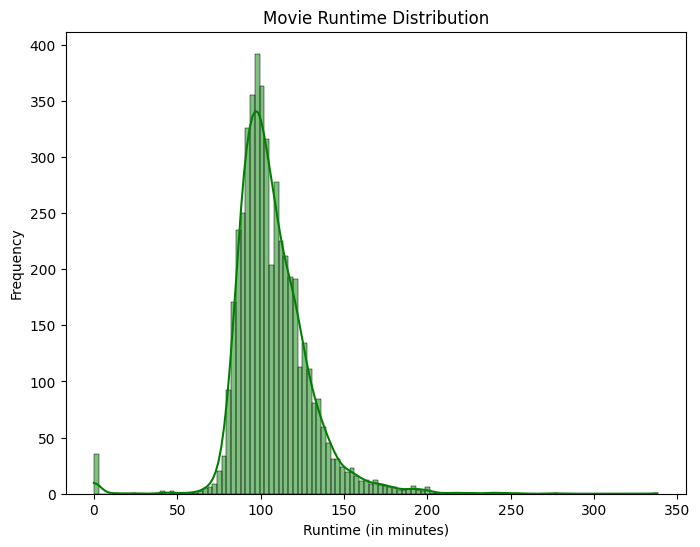

In [20]:
# Plot for Movie Runtime Distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['runtime'].dropna(), kde=True, color='green')
plt.title('Movie Runtime Distribution')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Frequency')
plt.show()

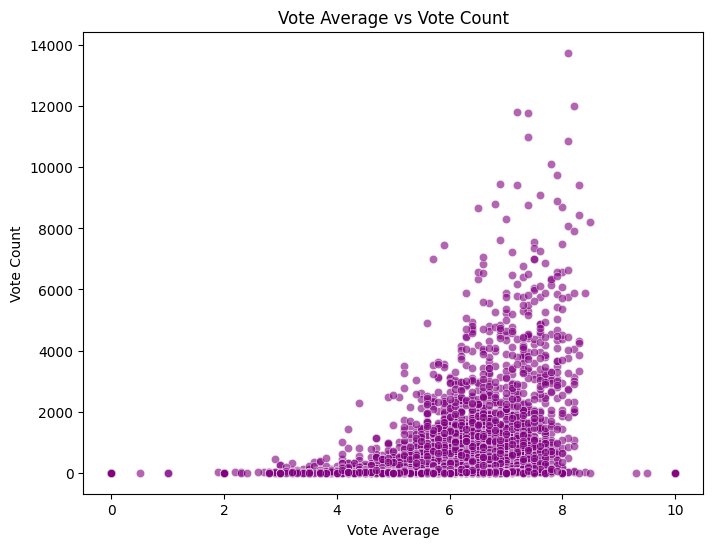

In [21]:
# Plot to compare Vote Average vs Vote Count

plt.figure(figsize=(8, 6))
sns.scatterplot(x='vote_average', y='vote_count', data=df, alpha=0.6, color='purple')
plt.title('Vote Average vs Vote Count')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.show()

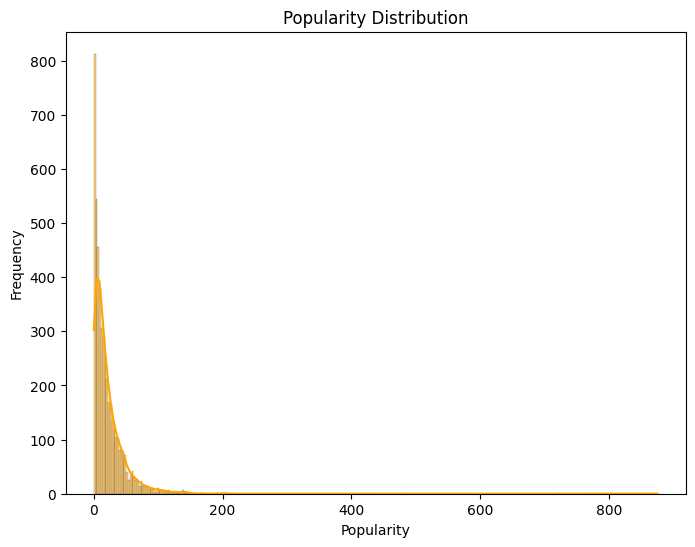

In [22]:
# Plot for Popularity Distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['popularity'], kde=True, color='orange')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

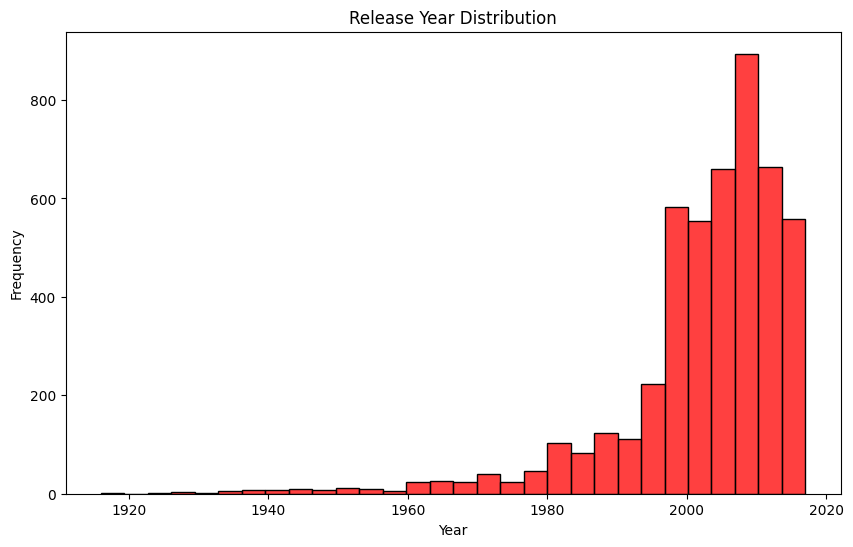

In [23]:
# Plot to analyze Release Year Distribution

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'].dropna(), bins=30, kde=False, color='red')
plt.title('Release Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

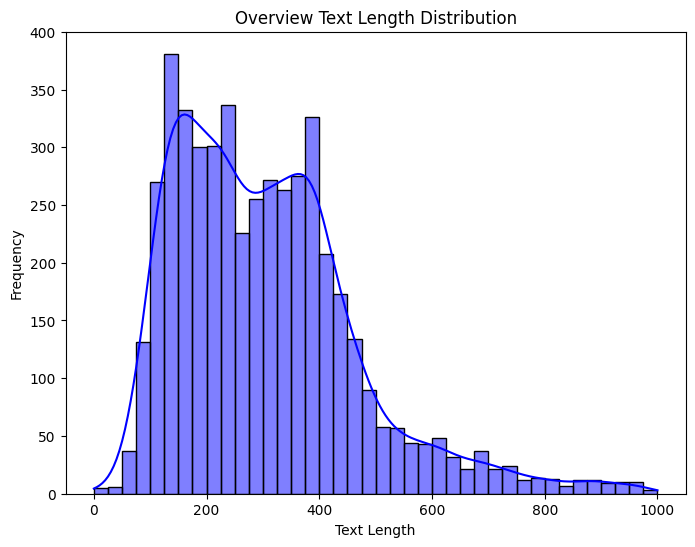

In [24]:
# Plot to Overview Text Length Distribution

df['overview_length'] = df['overview'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

plt.figure(figsize=(8, 6))
sns.histplot(df['overview_length'], kde=True, color='blue')
plt.title('Overview Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

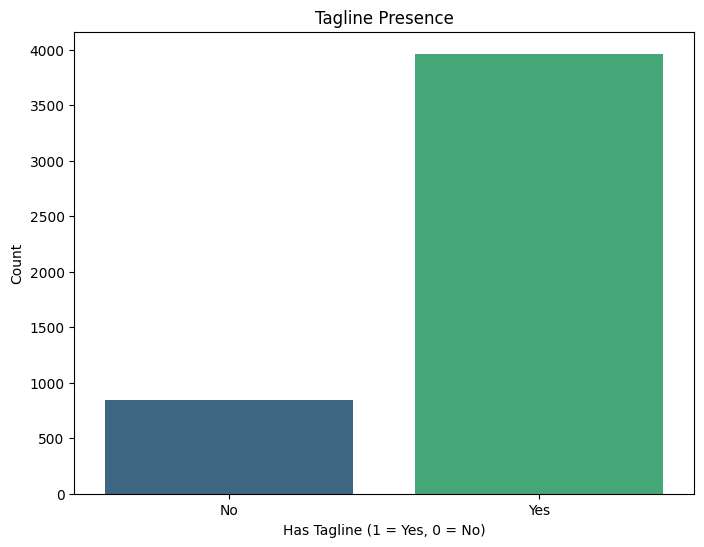

In [25]:
# Plot to analyze Tagline Presence
df['has_tagline'] = df['tagline'].notna().astype(int)

plt.figure(figsize=(8, 6))
sns.countplot(x='has_tagline', data=df, palette='viridis')
plt.title('Tagline Presence')
plt.xlabel('Has Tagline (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

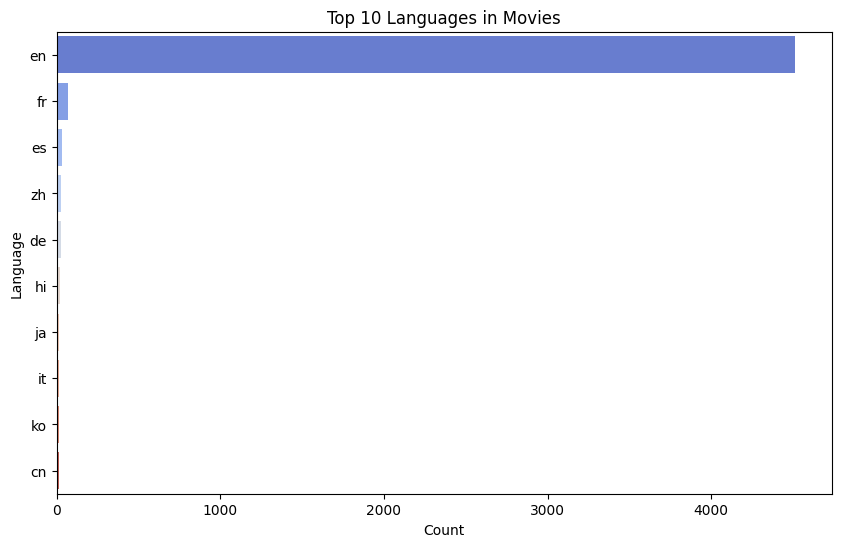

In [26]:
# Plot to analyze Language Distribution
language_count = count_values('original_language')
language_df = pd.DataFrame(language_count.items(), columns=['Language', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Language', data=language_df.head(10), palette='coolwarm')
plt.title('Top 10 Languages in Movies')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

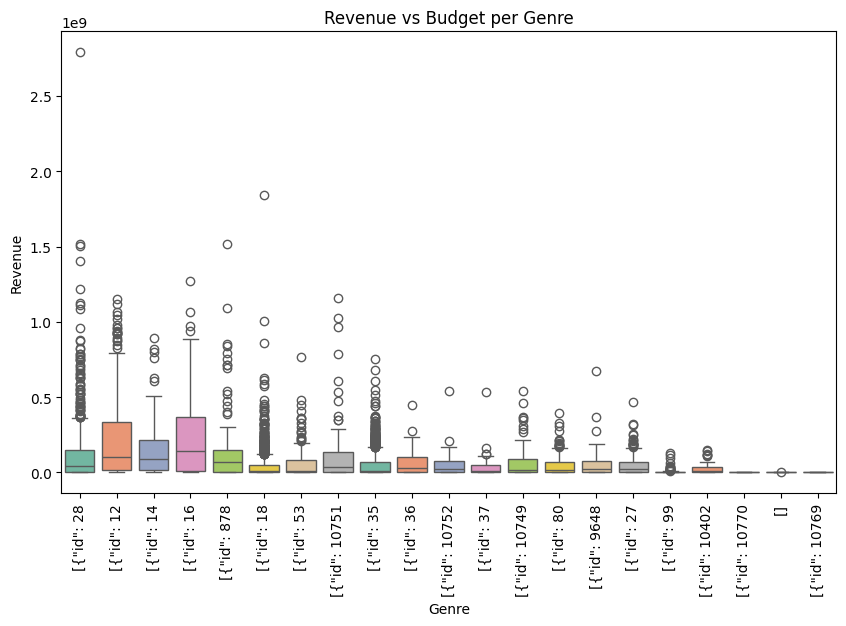

In [27]:
# Plot to analyze Revenue vs. Budget per Genre

df['main_genre'] = df['genres'].apply(lambda x: str(x).split(',')[0] if pd.notna(x) else 'Unknown')

plt.figure(figsize=(10, 6))
sns.boxplot(x='main_genre', y='revenue', data=df, palette='Set2')
plt.title('Revenue vs Budget per Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

## Data Cleaning & Preprocessing

In [28]:
## Extracting only neccessory columns

df = df[['movie_id','title','overview','genres','keywords','cast','crew']]

In [29]:
df.shape

(4809, 7)

In [30]:
df.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


In [32]:
df.isnull().sum()

,0
movie_id,0
title,0
overview,3
genres,0
keywords,0
cast,0
crew,0


In [33]:
df.duplicated().sum()

0

In [34]:
# Preprocessing movie dataset by extracting and combining features like genres, cast, crew, and keywords into a 'tags' column.

import ast

# Converting function to extract 'name' from a list of dictionaries
def convert(text):
    return [i['name'] for i in ast.literal_eval(text)]

# Function to fetch 'name' of the director from the crew
def fetch_director(text):
    return [i['name'] for i in ast.literal_eval(text) if i['job'] == 'Director']

# Collapse function to remove spaces in strings
def collapse(L):
    return [i.replace(" ", "") for i in L]

# Apply transformations to the dataframe
df.dropna(inplace=True)

# Apply convert function to 'genres' and 'keywords' columns
df['genres'] = df['genres'].apply(convert)
df['keywords'] = df['keywords'].apply(convert)

# Apply convert function to 'cast' and limit to the first 3 elements
df['cast'] = df['cast'].apply(lambda x: convert(x)[:3])

# Apply fetch_director function to 'crew' column
df['crew'] = df['crew'].apply(fetch_director)

# Collapse space characters in lists for 'cast', 'crew', 'genres', and 'keywords'
df['cast'] = df['cast'].apply(collapse)
df['crew'] = df['crew'].apply(collapse)
df['genres'] = df['genres'].apply(collapse)
df['keywords'] = df['keywords'].apply(collapse)

# Split 'overview' into words
df['overview'] = df['overview'].apply(lambda x: x.split())

In [35]:
df.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


In [36]:
# Combining 'overview', 'genres', 'keywords', 'cast', and 'crew' into a 'tags' column
df['tags'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']

# Drop the original columns and join 'tags' list into a single string
new_df = df.drop(columns=['overview', 'genres', 'keywords', 'cast', 'crew'])
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))

new_df.head(2)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."




```
# This is formatted as code
```

## Model Training

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [38]:
vector = cv.fit_transform(new_df['tags']).toarray()

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vector)

# Model Performance and Accuracy

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

new_df['target'] = np.random.randint(0, 2, size=len(new_df))  # Example: binary classification

In [41]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(vector, new_df['target'], test_size=0.2, random_state=42)

# Train a simple model (replace with your actual model)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.47193347193347196


In [42]:
# Train a simple model (replace with your actual model)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.46465696465696466


In [43]:
# Train a simple model (replace with your actual model)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.4875259875259875


In [44]:
# Train a simple model (replace with your actual model)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.502079002079002


In [45]:
import pickle
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [46]:
import os
print(os.getcwd())  # Check your current directory

/content


## Recommendation System

In [47]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)

In [48]:
recommend('Spider-Man')

Spider-Man 3
Spider-Man 2
The Amazing Spider-Man 2
The Amazing Spider-Man
Arachnophobia


## Conclusion

In this notebook, we successfully built a content-based movie recommendation system using features such as genres, keywords, cast, and crew. After thorough data preprocessing and feature engineering, including the creation of a unified 'tags' column, we developed a recommendation model that utilizes the similarity between movie metadata to suggest relevant films. The system effectively identifies patterns in movie attributes, providing personalized recommendations based on content similarity.

This approach highlights the model's ability to generate relevant movie suggestions, enhancing user experience by focusing on the movie's metadata. Future improvements could involve incorporating additional features like movie ratings or experimenting with more advanced techniques, such as hybrid recommendation models, to further refine and optimize the system.